In [ ]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/BIOINFORMATICSII/Assignment/"
model_loc = "/content/gdrive/My Drive/BIOINFORMATICSII/Assignment/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Mounted at /content/gdrive
['heart.csv', 'Grid Search_ Assignment 3_Heart_Disease_NN.ipynb', 'Assignment 2_Heart_Disease_NN.ipynb']


In [ ]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      1

In [ ]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [ ]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

In [ ]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values # take target of the value
y = y.reshape(y.shape[0],1) # reshape y array into 1 dimension
x = data.drop(['target'],axis=1) #drop the  'target' in the x data
##
print(x.shape)
print(y.shape)

(303, 21)
(303, 1)


In [ ]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset
data = pd.DataFrame({'A':[10,20,30], 'B':[100,200,300], 'C':[1000, 2000, 3000]})
print("Original Dataset:")
print(data)


Original Dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000


In [ ]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.111702,0.257092,0.413121,0.265957,0.004078,0.000000,0.001773,0.000000,0.000000,0.001773,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.001773,0.000000,0.0
1,0.065603,0.230496,0.443262,0.331560,0.006206,0.000000,0.001773,0.000000,0.001773,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
2,0.072695,0.230496,0.361702,0.304965,0.002482,0.003546,0.000000,0.001773,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
3,0.099291,0.212766,0.418440,0.315603,0.001418,0.003546,0.001773,0.001773,0.000000,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
4,0.101064,0.212766,0.627660,0.289007,0.001064,0.003546,0.000000,0.000000,0.000000,0.000000,...,0.001773,0.0,0.001773,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0


After applying min-max normalization to the heart dataset, all values are scaled to a range between 0 and 1. This ensures uniformity in the scale of features, facilitating better learning for machine learning algorithms.

In [ ]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)

# re-create train and validation set
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.33, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(212, 21)
(60, 21)
(31, 21)


#Experiment 1

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(128, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=32, verbose=1, callbacks=callbacks_list)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2816      
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6977 (27.25 KB)
Trainable params: 6977 (27.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 2s 195ms/step - loss: 0.2509 - acc: 0.4575 - val_loss: 0.2509 - val_acc: 0.4500
Epoch 2/1000
7/7 [==============================] - 0s 12ms/step - loss: 0.2506 - acc: 0.4575 - val_loss: 0.2506 - val_acc: 0.4500
Epoch 3/1000
7/7 [===

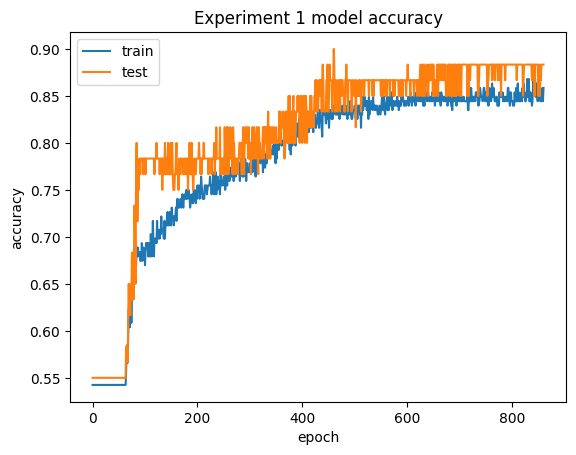

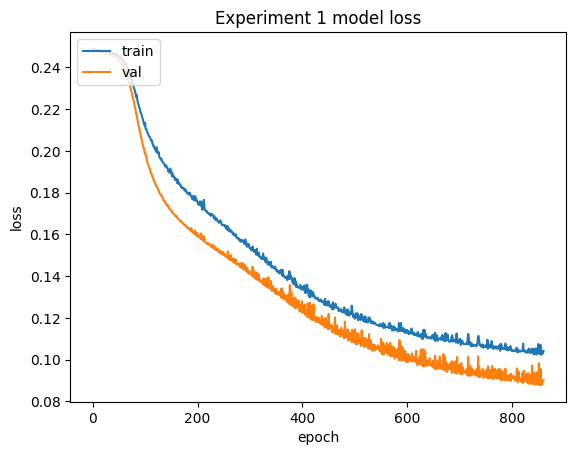

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 1 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 1 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 38ms/step - loss: 0.1542 - acc: 0.8065
Experiment 1

acc: 80.65%
loss: 0.15
1/1 [==============================] - 0s 89ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  Pr

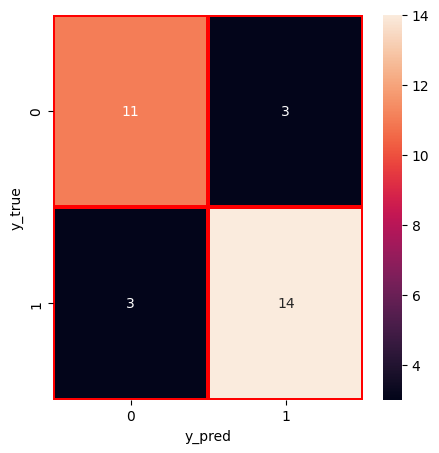


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 1')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

#Experiment 2


In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(128, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=64, verbose=1, callbacks=callbacks_list)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               2816      
                                                                 
 dense_13 (Dense)            (None, 32)                4128      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6977 (27.25 KB)
Trainable params: 6977 (27.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 1s 75ms/step - loss: 0.2492 - acc: 0.5425 - val_loss: 0.2489 - val_acc: 0.5500
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2490 - acc: 0.5425 - val_loss: 0.2487 - val_acc: 0.5500
Epoch 3/1000
4/4 [====

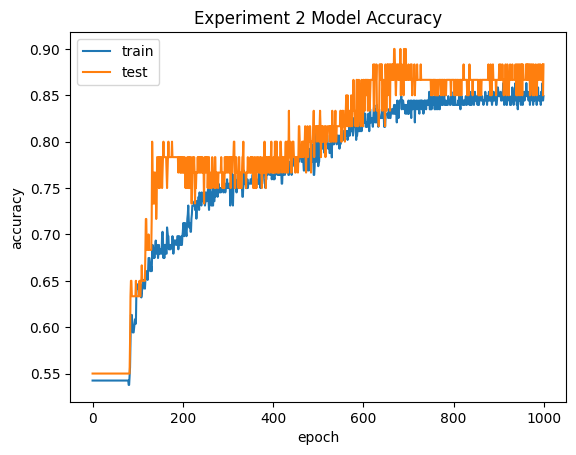

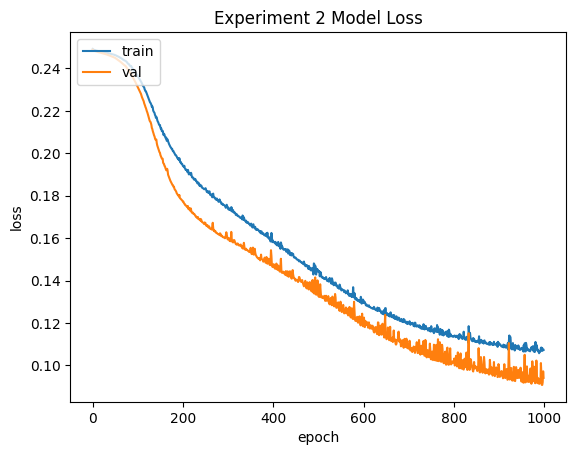

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 2 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 2 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 39ms/step - loss: 0.1464 - acc: 0.8387
Experiment 2

acc: 83.87%
loss: 0.15


1/1 [==============================] - 0s 119ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [1]  Predicted: [1] Result: 

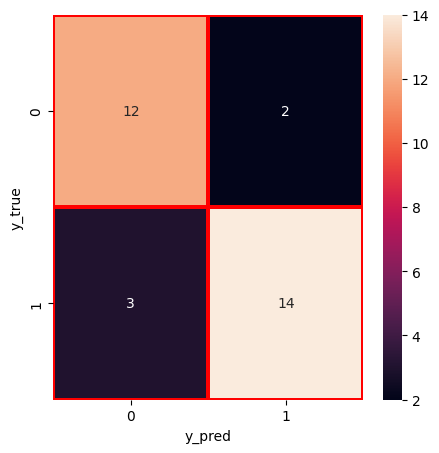


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 2')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

#Experiment 3

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(128, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=32, verbose=1, callbacks=callbacks_list)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               2816      
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6977 (27.25 KB)
Trainable params: 6977 (27.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 1s 40ms/step - loss: 0.2488 - acc: 0.5425 - val_loss: 0.2485 - val_acc: 0.5500
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.2488 - acc: 0.5425 - val_loss: 0.2485 - val_acc: 0.5500
Epoch 3/1000
7/7 [====

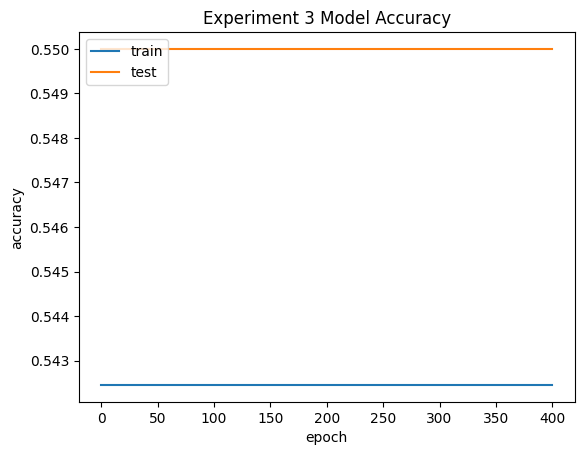

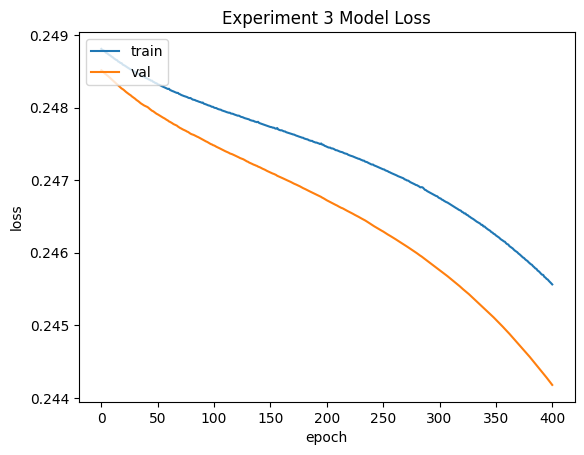

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 3 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 3 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 29ms/step - loss: 0.2448 - acc: 0.5484
Experiment 3

acc: 54.84%
loss: 0.24
1/1 [==============================] - 0s 59ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [0]  Predicted: [1]  Result: Fail
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [1]  Result: Fail
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [1]  Result: Fail
No: 12 Actual: [0]  Predicted: [1]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [1]  Result: Fail
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [1]  Result: Fail
No: 18 Actual: 

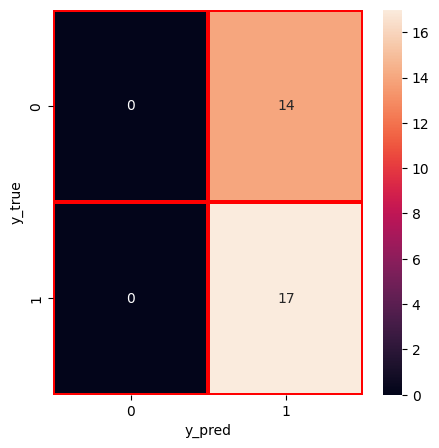


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.55      1.00      0.71        17

    accuracy                           0.55        31
   macro avg       0.27      0.50      0.35        31
weighted avg       0.30      0.55      0.39        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 3')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl ,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 4

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(128, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=64, verbose=1, callbacks=callbacks_list)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               2816      
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6977 (27.25 KB)
Trainable params: 6977 (27.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 1s 71ms/step - loss: 0.2508 - acc: 0.4575 - val_loss: 0.2508 - val_acc: 0.4500
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2507 - acc: 0.4575 - val_loss: 0.2508 - val_acc: 0.4500
Epoch 3/1000
4/4 [====

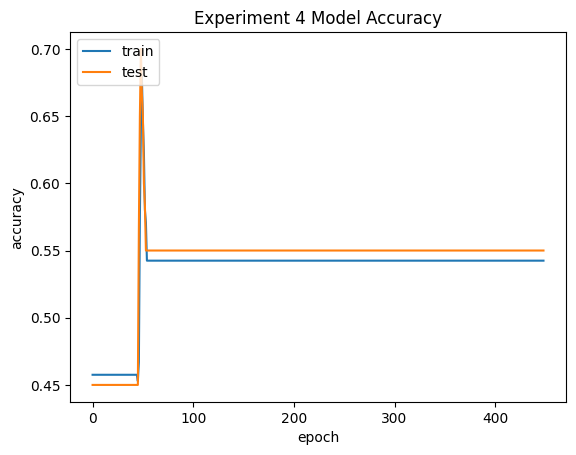

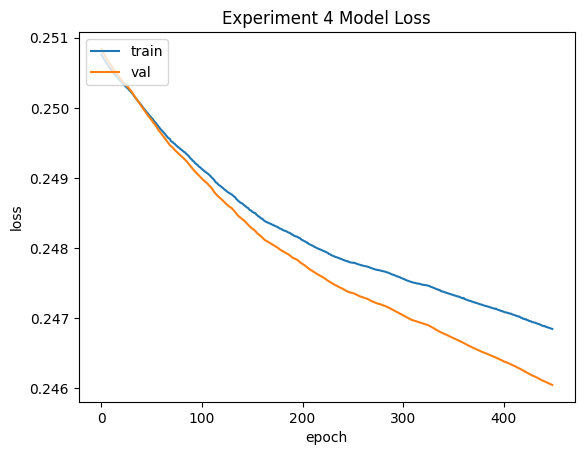

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 4 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 4 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 152ms/step - loss: 0.2463 - acc: 0.5484
Experiment 4

acc: 54.84%
loss: 0.25
1/1 [==============================] - 0s 322ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [0]  Predicted: [1]  Result: Fail
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [1]  Result: Fail
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [1]  Result: Fail
No: 12 Actual: [0]  Predicted: [1]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [1]  Result: Fail
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [1]  Result: Fail
No: 18 Actual

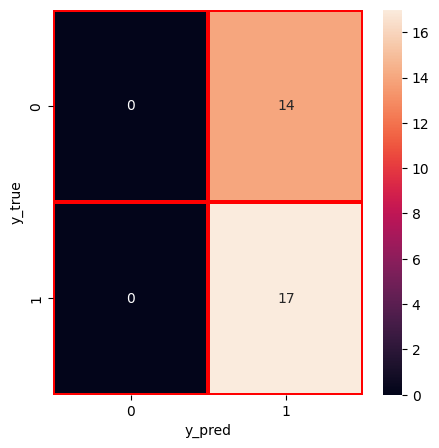


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.55      1.00      0.71        17

    accuracy                           0.55        31
   macro avg       0.27      0.50      0.35        31
weighted avg       0.30      0.55      0.39        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 4')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 5

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(64, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=32, verbose=1, callbacks=callbacks_list)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1408      
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 1s 39ms/step - loss: 0.2499 - acc: 0.5708 - val_loss: 0.2498 - val_acc: 0.5500
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.2498 - acc: 0.5425 - val_loss: 0.2497 - val_acc: 0.5500
Epoch 3/1000
7/7 [====

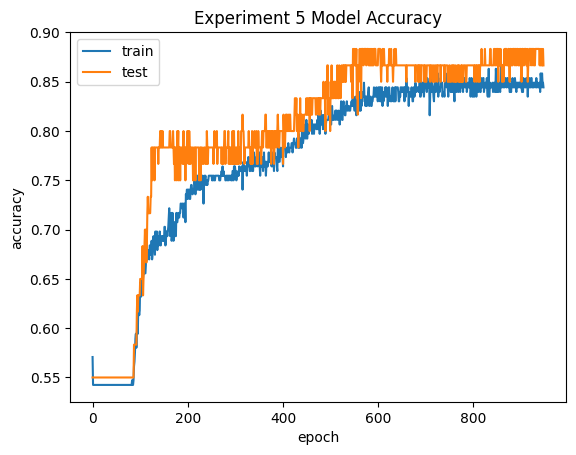

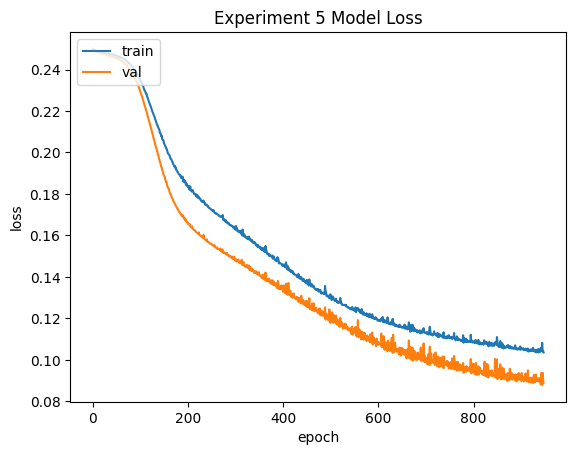

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 5 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 5 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 26ms/step - loss: 0.1472 - acc: 0.8387
Experiment 5 

acc: 83.87%
loss: 0.15
1/1 [==============================] - 0s 62ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  P

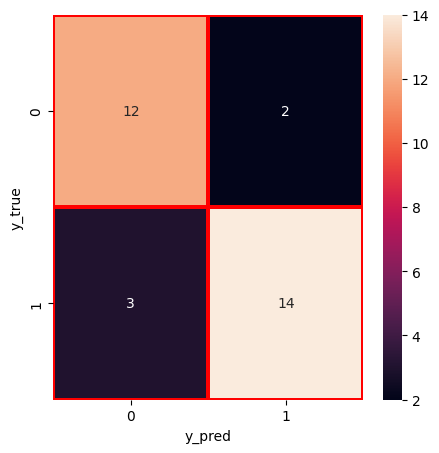


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 5 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 6

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(64, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=64, verbose=1, callbacks=callbacks_list)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1408      
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 1s 73ms/step - loss: 0.2497 - acc: 0.5425 - val_loss: 0.2494 - val_acc: 0.5500
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2495 - acc: 0.5425 - val_loss: 0.2493 - val_acc: 0.5500
Epoch 3/1000
4/4 [====

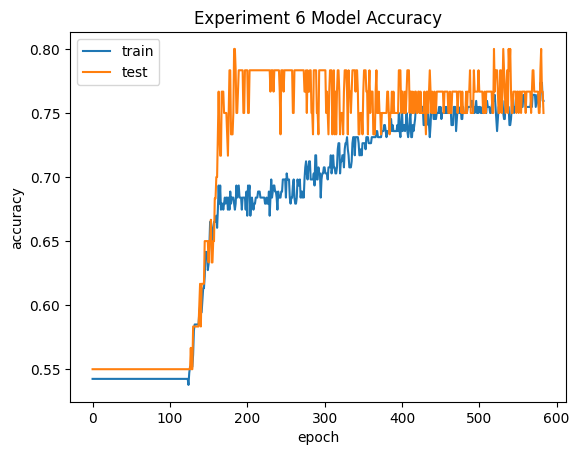

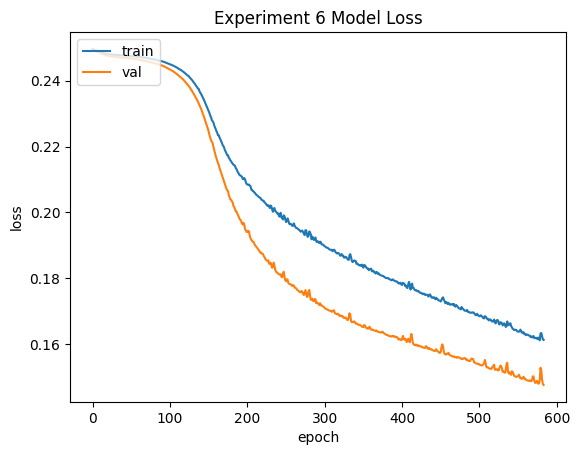

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 6 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 6 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 37ms/step - loss: 0.1517 - acc: 0.8387
Experiment 6 

acc: 83.87%
loss: 0.15


1/1 [==============================] - 0s 100ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [0] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [0]  Result: Fail
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [1]  Predicted: [1] Result: 

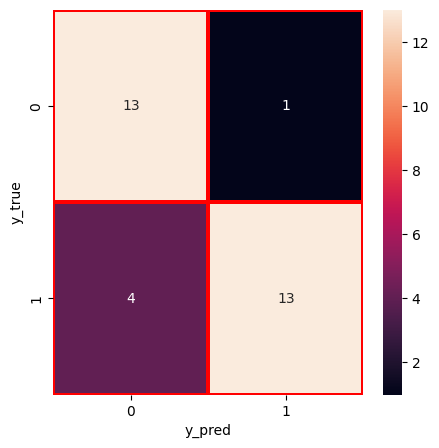


              precision    recall  f1-score   support

           0       0.76      0.93      0.84        14
           1       0.93      0.76      0.84        17

    accuracy                           0.84        31
   macro avg       0.85      0.85      0.84        31
weighted avg       0.85      0.84      0.84        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 6 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 7

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(64, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=32, verbose=1, callbacks=callbacks_list)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                1408      
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 1s 42ms/step - loss: 0.2496 - acc: 0.5425 - val_loss: 0.2495 - val_acc: 0.5500
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.2496 - acc: 0.5425 - val_loss: 0.2495 - val_acc: 0.5500
Epoch 3/1000
7/7 [=====

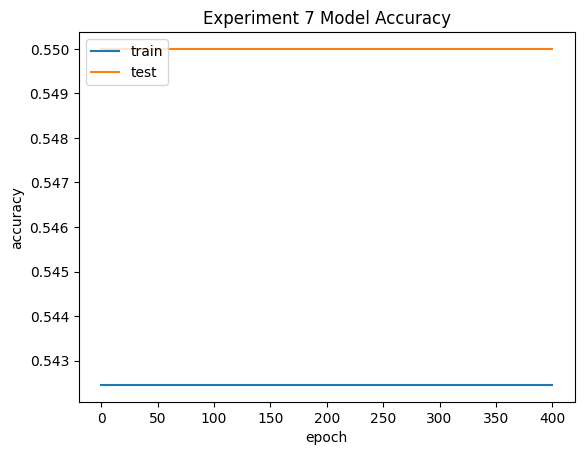

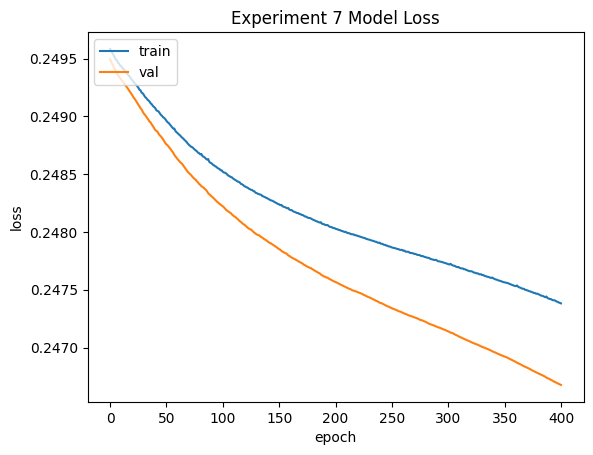

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 7 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 7 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 26ms/step - loss: 0.2467 - acc: 0.5484
Experiment 7 

acc: 54.84%
loss: 0.25
1/1 [==============================] - 0s 62ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [0]  Predicted: [1]  Result: Fail
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [1]  Result: Fail
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [1]  Result: Fail
No: 12 Actual: [0]  Predicted: [1]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [1]  Result: Fail
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [1]  Result: Fail
No: 18 Actual:

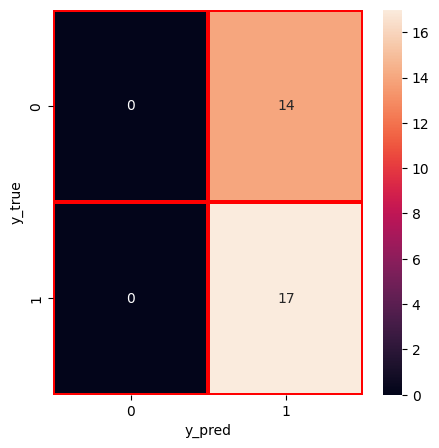


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.55      1.00      0.71        17

    accuracy                           0.55        31
   macro avg       0.27      0.50      0.35        31
weighted avg       0.30      0.55      0.39        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 7 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl ,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 8

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(64, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=64, verbose=1, callbacks=callbacks_list)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 64)                1408      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 1s 78ms/step - loss: 0.2501 - acc: 0.4575 - val_loss: 0.2501 - val_acc: 0.4500
Epoch 2/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.2501 - acc: 0.4575 - val_loss: 0.2501 - val_acc: 0.4500
Epoch 3/1000
4/4 [====

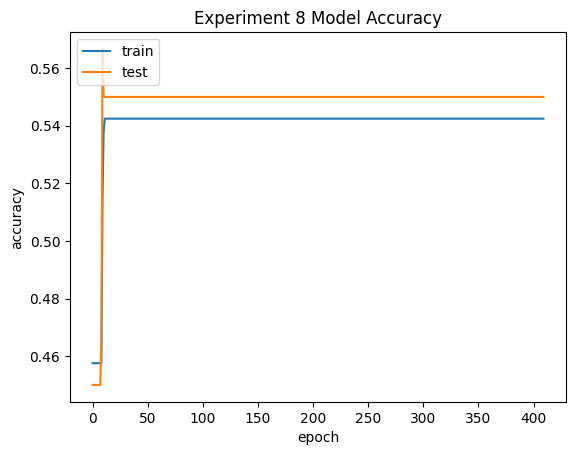

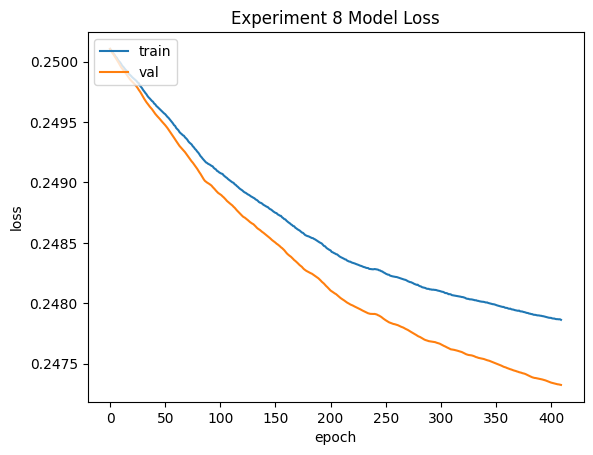

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 8 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 8 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 27ms/step - loss: 0.2473 - acc: 0.5484
Experiment 8 

acc: 54.84%
loss: 0.25
1/1 [==============================] - 0s 58ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [0]  Predicted: [1]  Result: Fail
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [1]  Result: Fail
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [1]  Result: Fail
No: 12 Actual: [0]  Predicted: [1]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [1]  Result: Fail
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [1]  Result: Fail
No: 18 Actual:

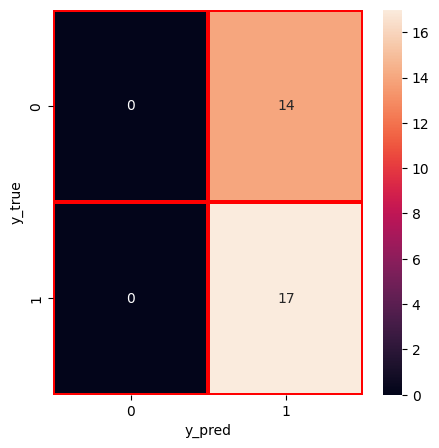


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.55      1.00      0.71        17

    accuracy                           0.55        31
   macro avg       0.27      0.50      0.35        31
weighted avg       0.30      0.55      0.39        31



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 8 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl ,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 9

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(128, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=32, verbose=1, callbacks=callbacks_list)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               2816      
                                                                 
 dense_25 (Dense)            (None, 32)                4128      
                                                                 
 dense_26 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6977 (27.25 KB)
Trainable params: 6977 (27.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 1s 38ms/step - loss: 0.2526 - acc: 0.4575 - val_loss: 0.2508 - val_acc: 0.4500
Epoch 2/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.2502 - acc: 0.4858 - val_loss: 0.2491 - val_acc: 0.5500
Epoch 3/1000
7/7 [=====

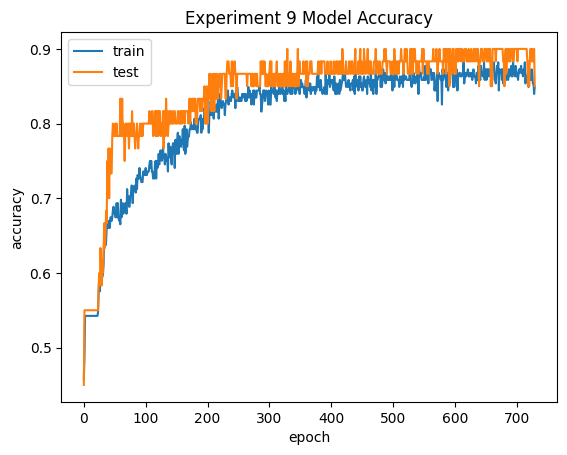

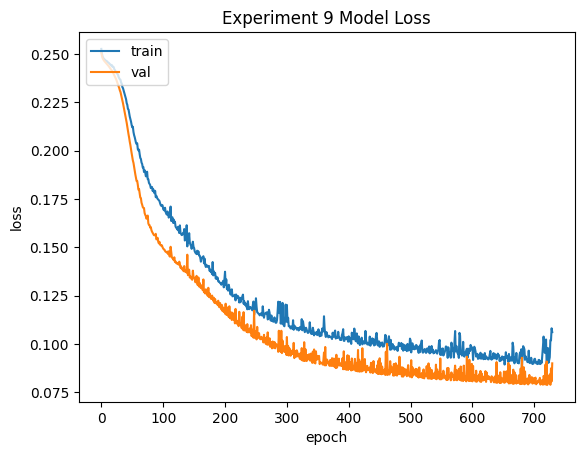

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 9 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 9 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 27ms/step - loss: 0.1820 - acc: 0.7742
Experiment 9 

acc: 77.42%
loss: 0.18
1/1 [==============================] - 0s 58ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  P

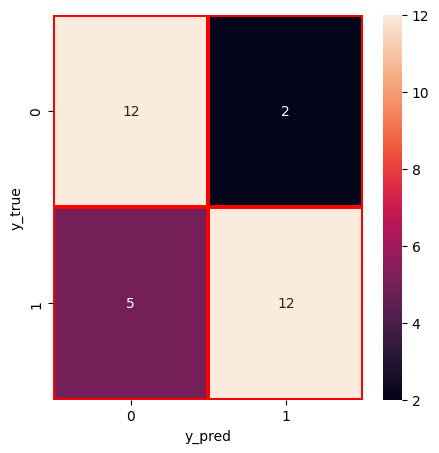


              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       0.86      0.71      0.77        17

    accuracy                           0.77        31
   macro avg       0.78      0.78      0.77        31
weighted avg       0.79      0.77      0.77        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 9 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl ,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 10

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(128, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=64, verbose=1, callbacks=callbacks_list)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               2816      
                                                                 
 dense_28 (Dense)            (None, 32)                4128      
                                                                 
 dense_29 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6977 (27.25 KB)
Trainable params: 6977 (27.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 1s 86ms/step - loss: 0.2485 - acc: 0.5802 - val_loss: 0.2464 - val_acc: 0.5500
Epoch 2/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.2468 - acc: 0.5425 - val_loss: 0.2454 - val_acc: 0.5500
Epoch 3/1000
4/4 [====

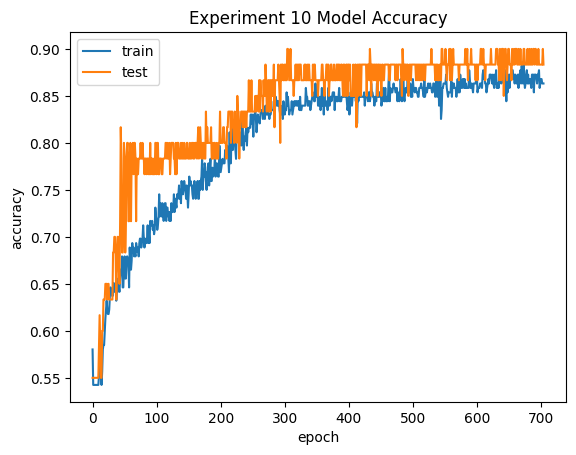

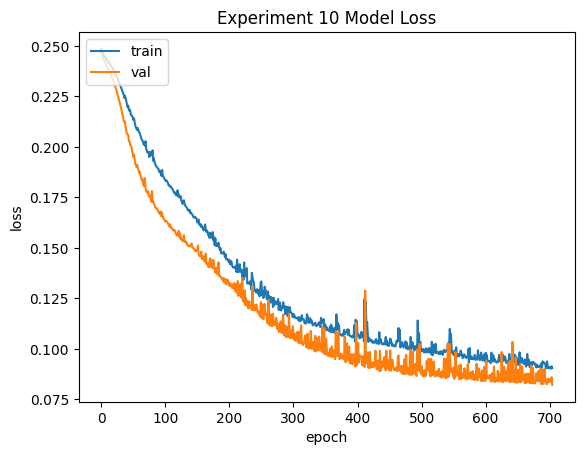

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 10 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 10 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 26ms/step - loss: 0.1630 - acc: 0.7742
Experiment 10 

acc: 77.42%
loss: 0.16
1/1 [==============================] - 0s 63ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0] 

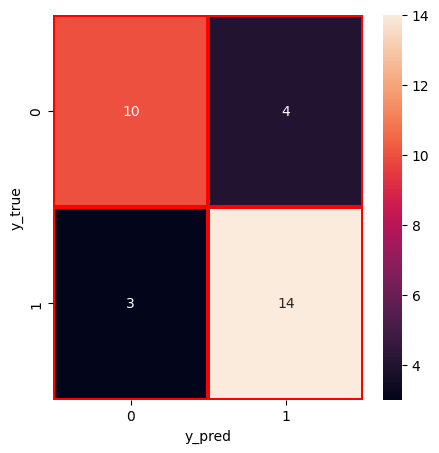


              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.78      0.82      0.80        17

    accuracy                           0.77        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.77      0.77      0.77        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 10 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl ,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 11

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(128, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=32, verbose=1, callbacks=callbacks_list)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               2816      
                                                                 
 dense_31 (Dense)            (None, 32)                4128      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6977 (27.25 KB)
Trainable params: 6977 (27.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 1s 40ms/step - loss: 0.2524 - acc: 0.4575 - val_loss: 0.2518 - val_acc: 0.4500
Epoch 2/1000
7/7 [==============================] - 0s 11ms/step - loss: 0.2518 - acc: 0.4575 - val_loss: 0.2512 - val_acc: 0.4500
Epoch 3/1000
7/7 [===

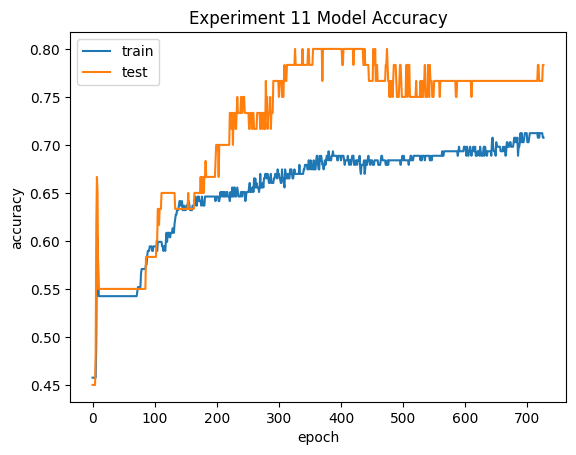

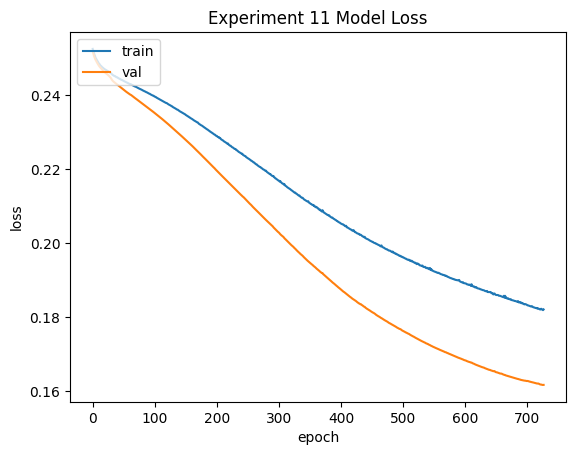

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 11 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 11 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 35ms/step - loss: 0.1699 - acc: 0.8387
Experiment 11 

acc: 83.87%
loss: 0.17
1/1 [==============================] - 0s 89ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [0] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [0]  Result: Fail
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  

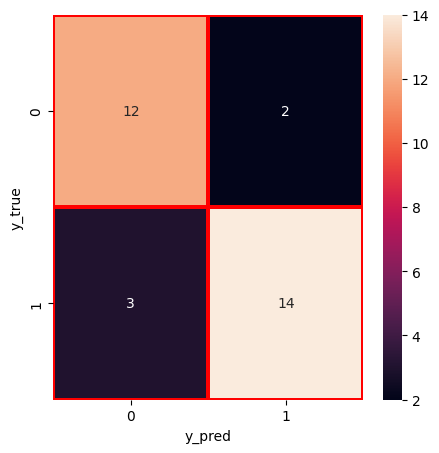


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 11 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl ,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 12

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(128, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=64, verbose=1, callbacks=callbacks_list)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 128)               2816      
                                                                 
 dense_34 (Dense)            (None, 32)                4128      
                                                                 
 dense_35 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6977 (27.25 KB)
Trainable params: 6977 (27.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 1s 73ms/step - loss: 0.2493 - acc: 0.5566 - val_loss: 0.2491 - val_acc: 0.5500
Epoch 2/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.2491 - acc: 0.5472 - val_loss: 0.2489 - val_acc: 0.5500
Epoch 3/1000
4/4 [===

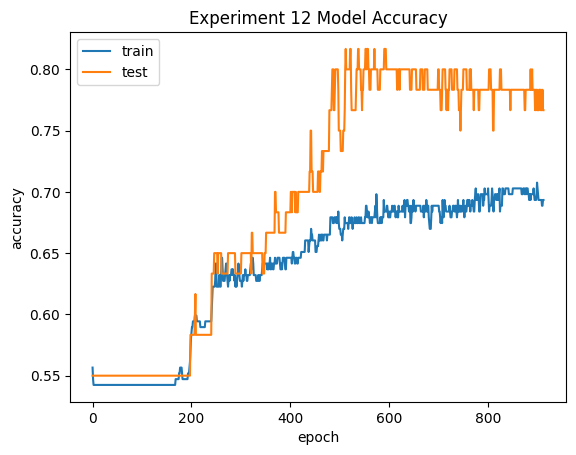

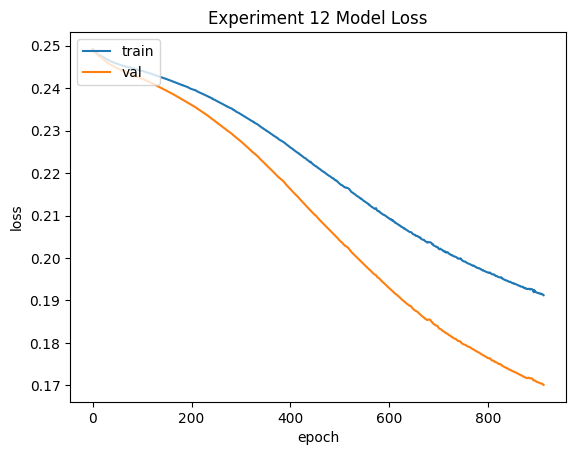

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 12 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 12 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 26ms/step - loss: 0.1778 - acc: 0.8065
Experiment 12

acc: 80.65%
loss: 0.18
1/1 [==============================] - 0s 58ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [0] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [1]  Result: Fail
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [0]  Result: Fail
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  

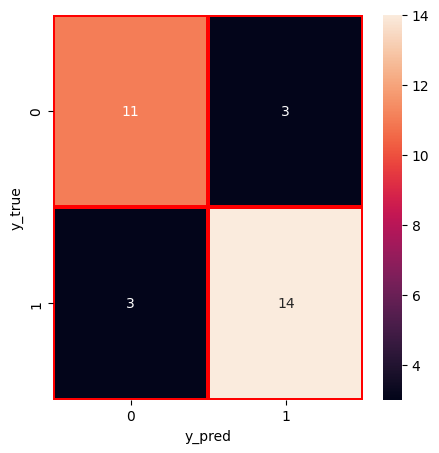


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 12')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl ,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 13

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=32, verbose=1, callbacks=callbacks_list)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                1408      
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 1s 38ms/step - loss: 0.2500 - acc: 0.5142 - val_loss: 0.2489 - val_acc: 0.5500
Epoch 2/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.2484 - acc: 0.5425 - val_loss: 0.2480 - val_acc: 0.5500
Epoch 3/1000
7/7 [===

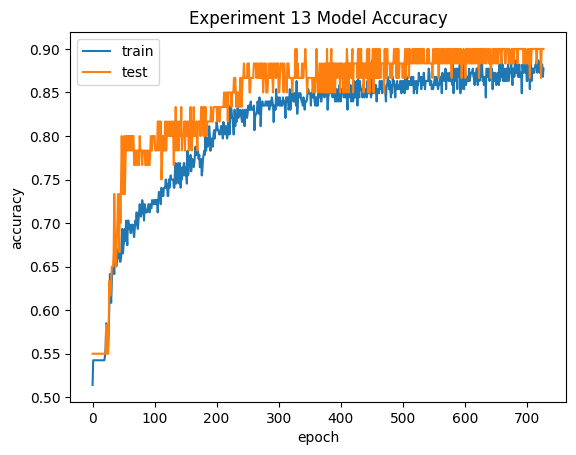

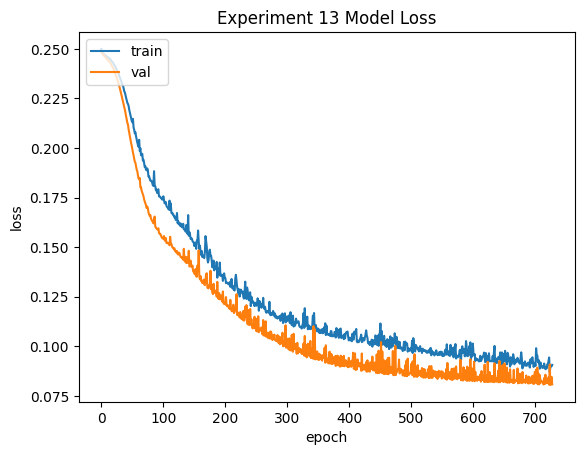

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 13 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 13 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 25ms/step - loss: 0.1702 - acc: 0.7097
Experiment 13 

acc: 70.97%
loss: 0.17
1/1 [==============================] - 0s 71ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0] 

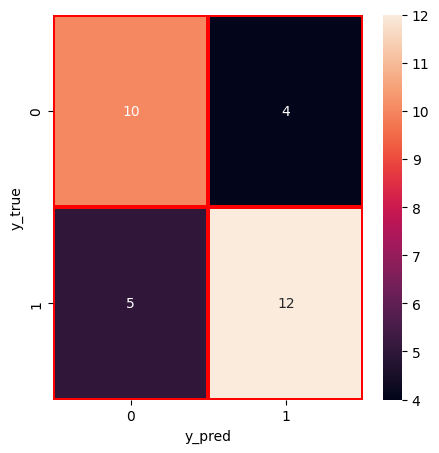


              precision    recall  f1-score   support

           0       0.67      0.71      0.69        14
           1       0.75      0.71      0.73        17

    accuracy                           0.71        31
   macro avg       0.71      0.71      0.71        31
weighted avg       0.71      0.71      0.71        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 13 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl ,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 14

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=64, verbose=1, callbacks=callbacks_list)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 64)                1408      
                                                                 
 dense_40 (Dense)            (None, 64)                4160      
                                                                 
 dense_41 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 1s 69ms/step - loss: 0.2499 - acc: 0.5613 - val_loss: 0.2484 - val_acc: 0.5500
Epoch 2/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.2484 - acc: 0.5425 - val_loss: 0.2475 - val_acc: 0.5500
Epoch 3/1000
4/4 [===

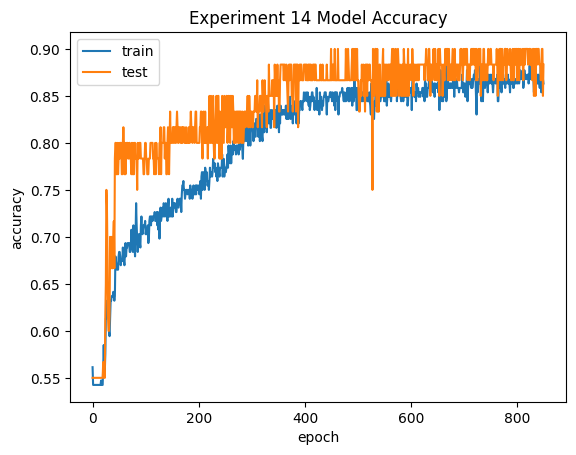

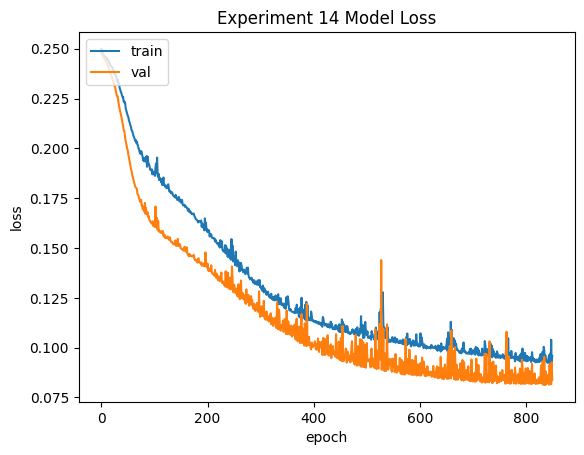

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 14 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 14 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 39ms/step - loss: 0.1666 - acc: 0.7742
Experiment 14 

acc: 77.42%
loss: 0.17
1/1 [==============================] - 0s 103ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [1]  Result: Fail
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0] 

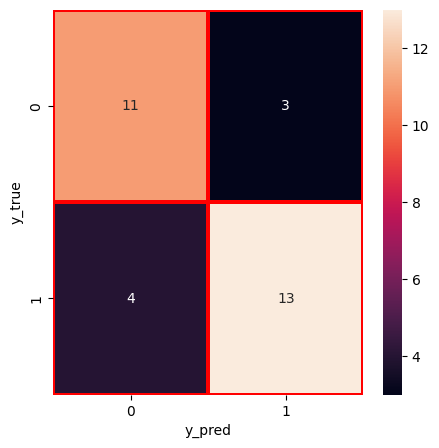


              precision    recall  f1-score   support

           0       0.73      0.79      0.76        14
           1       0.81      0.76      0.79        17

    accuracy                           0.77        31
   macro avg       0.77      0.78      0.77        31
weighted avg       0.78      0.77      0.77        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 14 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 15

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=32, verbose=1, callbacks=callbacks_list)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
7/7 [==============================] - 1s 45ms/step - loss: 0.2481 - acc: 0.5425 - val_loss: 0.2478 - val_acc: 0.5500
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.2479 - acc: 0.5425 - val_loss: 0.2476 - val_acc: 0.5500
Epoch 3/1000
7/7 [=======

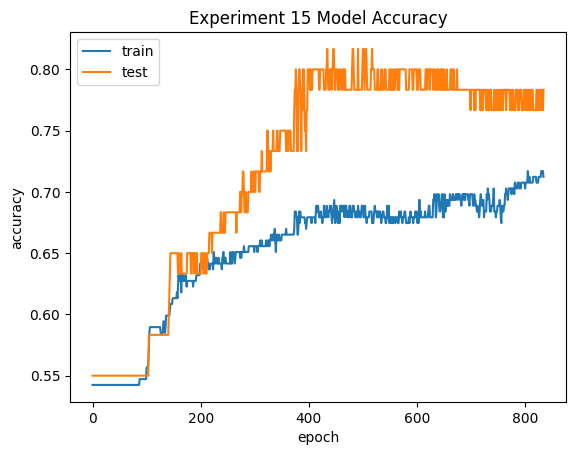

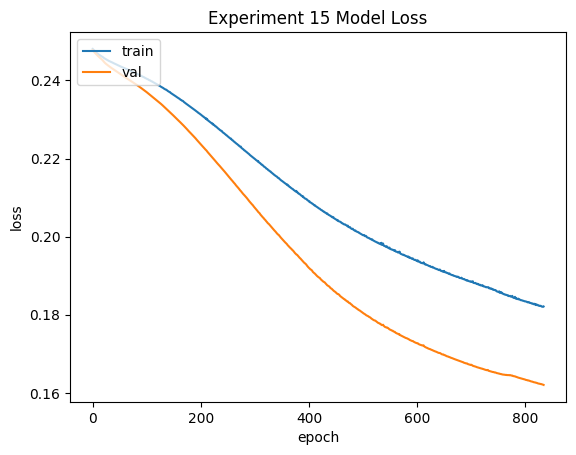

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 15 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 15 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 26ms/step - loss: 0.1689 - acc: 0.8387
Experiment 15 

acc: 83.87%
loss: 0.17
1/1 [==============================] - 0s 20ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [0] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [0] Result: Pass
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [0]  Result: Fail
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0]  

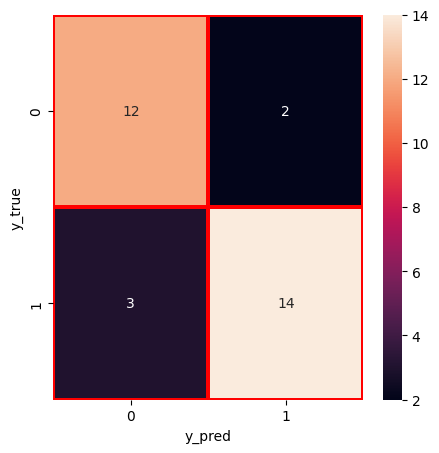


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        14
           1       0.88      0.82      0.85        17

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 15 ')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

# Experiment 16

In [ ]:
model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='relu')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=64, verbose=1, callbacks=callbacks_list)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 64)                1408      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
4/4 [==============================] - 1s 111ms/step - loss: 0.2482 - acc: 0.5425 - val_loss: 0.2478 - val_acc: 0.5500
Epoch 2/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.2481 - acc: 0.5425 - val_loss: 0.2477 - val_acc: 0.5500
Epoch 3/1000
4/4 [==

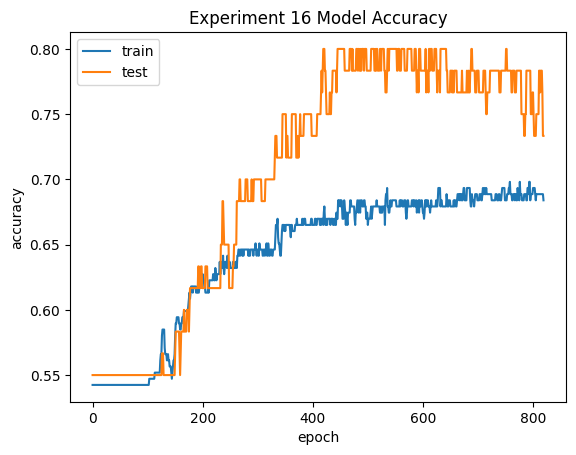

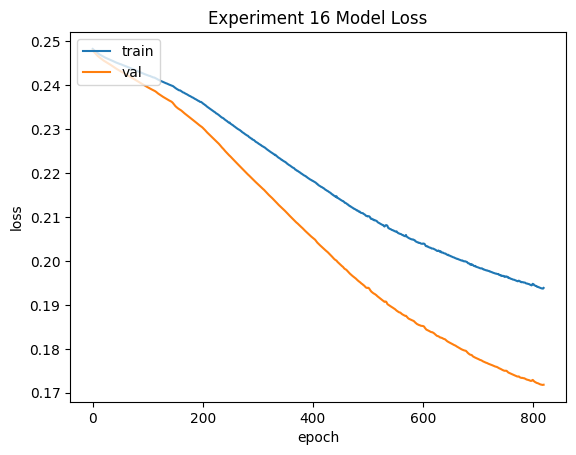

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('Experiment 16 Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Experiment 16 Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

1/1 [==============================] - 0s 27ms/step - loss: 0.1804 - acc: 0.8065
Experiment 16


acc: 80.65%
loss: 0.18
1/1 [==============================] - 0s 57ms/step
No: 1 Actual: [1]  Predicted: [1] Result: Pass
No: 2 Actual: [0]  Predicted: [0] Result: Pass
No: 3 Actual: [0]  Predicted: [0] Result: Pass
No: 4 Actual: [1]  Predicted: [1] Result: Pass
No: 5 Actual: [0]  Predicted: [0] Result: Pass
No: 6 Actual: [0]  Predicted: [0] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [1]  Predicted: [1] Result: Pass
No: 9 Actual: [1]  Predicted: [1] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [0]  Predicted: [1]  Result: Fail
No: 12 Actual: [0]  Predicted: [0] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [0]  Result: Fail
No: 17 Actual: [0]  Predicted: [0] Result: Pass
No: 18 Actual: [0] 

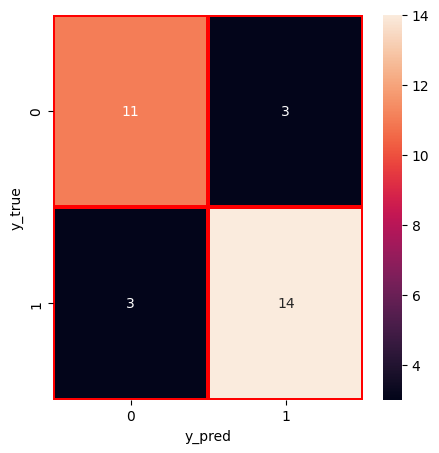


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.82      0.82      0.82        17

    accuracy                           0.81        31
   macro avg       0.80      0.80      0.80        31
weighted avg       0.81      0.81      0.81        31



In [ ]:
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print('Experiment 16\n')
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl,"\n\n")

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))